## MACHINE LEARNING ENGINEERING CAPSTONE PROJECT
* this project evaluates models using a lung_cancer.csv and can be used to predict lung cancer risk in patients.
* the dataset can be downloaded from kaggle using this [link](https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = UserWarning)

### 0. EXPLORATORY DATA AANALYSIS

In [4]:
df = pd.read_csv("lung_cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [6]:
df.columns = df.columns.str.lower().str.strip()
df

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic disease,fatigue,allergy,wheezing,alcohol consuming,coughing,shortness of breath,swallowing difficulty,chest pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [7]:
df.columns = df.columns.str.replace(' ', '_')
df

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 309 non-null    object
 1   age                    309 non-null    int64 
 2   smoking                309 non-null    int64 
 3   yellow_fingers         309 non-null    int64 
 4   anxiety                309 non-null    int64 
 5   peer_pressure          309 non-null    int64 
 6   chronic_disease        309 non-null    int64 
 7   fatigue                309 non-null    int64 
 8   allergy                309 non-null    int64 
 9   wheezing               309 non-null    int64 
 10  alcohol_consuming      309 non-null    int64 
 11  coughing               309 non-null    int64 
 12  shortness_of_breath    309 non-null    int64 
 13  swallowing_difficulty  309 non-null    int64 
 14  chest_pain             309 non-null    int64 
 15  lung_cancer            

In [9]:
df.describe().round(3)

,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain
count,309.000,309.000,309.000,309.000,309.000,309.000,309.000,309.000,309.000,309.000,309.000,309.000,309.000,309.000
mean,62.673,1.563,1.570,1.498,1.502,1.505,1.673,1.557,1.557,1.557,1.579,1.641,1.469,1.557
std,8.210,0.497,0.496,0.501,0.501,0.501,0.470,0.498,0.498,0.498,0.494,0.481,0.500,0.498
min,21.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,57.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
50%,62.000,2.000,2.000,1.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,1.000,2.000
75%,69.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000
max,87.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000


In [10]:
df.duplicated().sum()

np.int64(33)

In [11]:
df.shape

(309, 16)

In [12]:
df[df.duplicated(keep = False)]

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
23,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
51,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
75,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [13]:
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
272,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
273,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
274,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
binary_variables = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure',
                   'chronic_disease', 'fatigue', 'allergy', 'wheezing',
                   'alcohol_consuming', 'coughing', 'shortness_of_breath',
                   'swallowing_difficulty', 'chest_pain']

for binary_variable in binary_variables:
    df[binary_variable] = df[binary_variable].map({1: 0, 2: 1}) # 1 => no(0), 2 => yes(1)

for binary_variable in binary_variables:
    df[binary_variable] = df[binary_variable].map({0: 'no', 1: "yes"})

df

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,M,69,no,yes,yes,no,no,yes,no,yes,yes,yes,yes,yes,yes,YES
1,M,74,yes,no,no,no,yes,yes,yes,no,no,no,yes,yes,yes,YES
2,F,59,no,no,no,yes,no,yes,no,yes,no,yes,yes,no,yes,NO
3,M,63,yes,yes,yes,no,no,no,no,no,yes,no,no,yes,yes,NO
4,F,63,no,yes,no,no,no,no,no,yes,no,yes,yes,no,no,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,F,59,no,yes,yes,yes,no,no,yes,yes,no,yes,no,yes,no,YES
272,F,59,yes,no,no,no,yes,yes,yes,no,no,no,yes,no,no,NO
273,M,55,yes,no,no,no,no,yes,yes,no,no,no,yes,no,yes,NO
274,M,46,no,yes,yes,no,no,no,no,no,no,no,no,yes,yes,NO


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 276 non-null    object
 1   age                    276 non-null    int64 
 2   smoking                276 non-null    object
 3   yellow_fingers         276 non-null    object
 4   anxiety                276 non-null    object
 5   peer_pressure          276 non-null    object
 6   chronic_disease        276 non-null    object
 7   fatigue                276 non-null    object
 8   allergy                276 non-null    object
 9   wheezing               276 non-null    object
 10  alcohol_consuming      276 non-null    object
 11  coughing               276 non-null    object
 12  shortness_of_breath    276 non-null    object
 13  swallowing_difficulty  276 non-null    object
 14  chest_pain             276 non-null    object
 15  lung_cancer            

In [17]:
df.lung_cancer = df.lung_cancer.map({'NO': 0, 'YES': 1})

numerical_variables = ['age']
categorical_variables = ['gender'] + binary_variables

for categorical_variable in categorical_variables:
    df[categorical_variable] = df[categorical_variable].str.lower().str.replace(' ', '_')

df

,gender,age,smoking,yellow_fingers,anxiety,peer_pressure,chronic_disease,fatigue,allergy,wheezing,alcohol_consuming,coughing,shortness_of_breath,swallowing_difficulty,chest_pain,lung_cancer
0,m,69,no,yes,yes,no,no,yes,no,yes,yes,yes,yes,yes,yes,1
1,m,74,yes,no,no,no,yes,yes,yes,no,no,no,yes,yes,yes,1
2,f,59,no,no,no,yes,no,yes,no,yes,no,yes,yes,no,yes,0
3,m,63,yes,yes,yes,no,no,no,no,no,yes,no,no,yes,yes,0
4,f,63,no,yes,no,no,no,no,no,yes,no,yes,yes,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,f,59,no,yes,yes,yes,no,no,yes,yes,no,yes,no,yes,no,1
272,f,59,yes,no,no,no,yes,yes,yes,no,no,no,yes,no,no,0
273,m,55,yes,no,no,no,no,yes,yes,no,no,no,yes,no,yes,0
274,m,46,no,yes,yes,no,no,no,no,no,no,no,no,yes,yes,0


In [18]:
# check distribution => dataset is not balanced
df['lung_cancer'].value_counts(normalize = True)

lung_cancer
1    0.862319
0    0.137681
Name: proportion, dtype: float64

### 1. SPLITTING DATASET USING train_test_split()
* 80% train set.
* 20% test set.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
y = df['lung_cancer']
y

0      1
1      1
2      0
3      0
4      0
      ..
271    1
272    0
273    0
274    0
275    1
Name: lung_cancer, Length: 276, dtype: int64

In [21]:
# stratify ensures that the proportions of classes in the target variable are preserved.
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42, stratify = y)

len(train_df), len(test_df), len(df)

(220, 56, 276)

In [22]:
train_df = train_df.reset_index(drop = True)
test_df = test_df.reset_index(drop = True)

### 2. FEATURE IMPORTANCE
* Mutual Information: measures importance of categorical variables.
* Correlation: measures importance of numerical variables.

In [23]:
# check distribution of the target variable in the dataset
train_df['lung_cancer'].value_counts(normalize = True)

lung_cancer
1    0.863636
0    0.136364
Name: proportion, dtype: float64

In [24]:
# check distribution of the target variable in the dataset
test_df['lung_cancer'].value_counts(normalize = True)

lung_cancer
1    0.857143
0    0.142857
Name: proportion, dtype: float64

#### 2.1. MUTUAL INFORMATION.
* more important (higher) to less important (lower).

In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
def mutual_information_heart(series):
    return mutual_info_score(series, train_df.lung_cancer)

mi_score = train_df[categorical_variables].apply(mutual_information_heart).sort_values(ascending = False)

In [27]:
cols = ['mi_scores']
pd.DataFrame(mi_score, columns = cols)

,mi_scores
allergy,0.055716
alcohol_consuming,0.046029
swallowing_difficulty,0.031484
peer_pressure,0.026819
chest_pain,0.023170
wheezing,0.022827
coughing,0.020591
yellow_fingers,0.017533
chronic_disease,0.016640
anxiety,0.011821


#### 2.2. CORRELATION.
* (value < 0) => negative correlation.
* (value > 0) => positive correlation.

In [28]:
correlation_score = train_df[numerical_variables].corrwith(train_df.lung_cancer).sort_values(ascending = False)

cols = ['correlation_score']
pd.DataFrame(correlation_score, columns = cols)

,correlation_score
age,0.052577


### 3. FEATURE MATRIX. 
* using a DictVectorizer.
* one-hot encoding.

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
# extract target variables from dataframes and store them as matrices:
y_train = train_df.lung_cancer.values
y_test = test_df.lung_cancer.values

# remove the target variable from dataframes:
del train_df['lung_cancer']
del test_df['lung_cancer']

# transform dataframes to dictionaries:
train_dict = train_df.to_dict(orient = 'records')
test_dict = test_df.to_dict(orient = 'records')

# initialise dictVectorizer and fit the training dictionary into it:
dictVectorizer = DictVectorizer(sparse = False)
dictVectorizer.fit(train_dict)

# extract dictVectorizer's feature matrix:
feature_matrix = dictVectorizer.feature_names_

# transform dictionaries to matrices:
X_train = dictVectorizer.transform(train_dict)
X_test = dictVectorizer.transform(test_dict)

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [33]:
len(X_train_resampled)

380

### 4. LOGISTIC REGRESSION MODEL TRAINING.
* Baseline model.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [35]:
lr_model = LogisticRegression(max_iter = 1000, random_state = 42)
lr_model.fit(X_train_resampled, y_train_resampled)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
y_prediction = lr_model.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, y_prediction)

0.953125

#### 4.1. LOGISTIC REGRESSION: PARAMETER TUNING.
* C.
* penalty = l1.

In [37]:
c_params = [0.01, 0.1, 1, 10, 100]
auc_scores = []

for c_param in c_params:
    logistic_model = LogisticRegression(penalty = 'l1', solver = 'liblinear', C = c_param, max_iter = 1000, random_state = 42)
    logistic_model.fit(X_train_resampled, y_train_resampled)

    y_prediction = logistic_model.predict_proba(X_test)[:, 1]
    auc = round(roc_auc_score(y_test, y_prediction), 4)
    auc_scores.append((c_param, auc))

cols = ['c_parameters', 'auc_scores']
logistic_df = pd.DataFrame(auc_scores, columns = cols).sort_values(by = "auc_scores", ascending = False).reset_index(drop = True)
logistic_df.head()

,c_parameters,auc_scores
0,0.10,0.9583
1,100.00,0.9505
2,10.00,0.9479
3,1.00,0.9453
4,0.01,0.6484


#### 4.2. LOGISTIC REGRESSION: PARAMETER TUNING.
* C.
* penalty = l2.

In [38]:
c_params = [0.01, 0.1, 1, 10, 100]
auc_scores = []

for c_param in c_params:
    logistic_model = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = c_param, max_iter = 1000, random_state = 42)
    logistic_model.fit(X_train_resampled, y_train_resampled)

    y_prediction = logistic_model.predict_proba(X_test)[:, 1]
    auc = round(roc_auc_score(y_test, y_prediction), 4)
    auc_scores.append((c_param, auc))

cols = ['c_parameters', 'auc_scores']
logistic_df = pd.DataFrame(auc_scores, columns = cols).sort_values(by = "auc_scores", ascending = False).reset_index(drop = True)
logistic_df.head()

,c_parameters,auc_scores
0,0.01,0.9714
1,0.10,0.9688
2,1.00,0.9557
3,10.00,0.9505
4,100.00,0.9505


#### 4.3. LOGISTIC REGRESSION: FINAL MODEL.
* C = {0.01}.
* penalty = l2.

In [39]:
regression_model = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 0.01, max_iter = 1000, random_state = 42)
regression_model.fit(X_train_resampled, y_train_resampled)

y_prediction = regression_model.predict_proba(X_test)[:, 1]
round(roc_auc_score(y_test, y_prediction), 4)

0.9714

### 5. DECISION TREE MODEL TRAINING.
* Baseline model.

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [42]:
dt_prediction = dt_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, dt_prediction)

0.90625

#### 5.1 HYPERPARAMETER TUNING: DECISION TREE MODEL
* max_depth.
* min_samples_leaf.

In [43]:
max_depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, 100, 200, 500]
depths = []

for max_depth in max_depths:
    tree_model = DecisionTreeClassifier(max_depth = max_depth)
    tree_model.fit(X_train, y_train)

    dt_prediction = tree_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, dt_prediction)
    
    depths.append((max_depth, auc_score))

cols = ['max_depth', 'auc_score']
depths_df = pd.DataFrame(depths, columns = cols).sort_values(by = 'auc_score', ascending = False).reset_index(drop = True)
depths_df.head()

,max_depth,auc_score
0,4,0.959635
1,5,0.942708
2,3,0.924479
3,10,0.906250
4,500,0.906250


#### 5.2 HYPERPARAMETER TUNING: DECISION TREE MODEL
* max_depth = {3, 4, 5}
* min_samples_leaf.

In [44]:
max_depths = [3, 4, 5]
min_samples = [1, 2, 3, 4, 5, 6, 10, 15, 20, 100]
auc_scores = []

for max_depth in max_depths:
    for min_sample in min_samples:
        tree_model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_sample)
        tree_model.fit(X_train, y_train)

        ydt_prediction = tree_model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, ydt_prediction)
        auc_scores.append((max_depth, min_sample, auc_score))
   
cols = ['max_depth', 'min_sample', 'auc_score']
decision_tree_df = pd.DataFrame(auc_scores, columns = cols).sort_values(by = 'auc_score', ascending = False).reset_index(drop = True)
decision_tree_df.head()

,max_depth,min_sample,auc_score
0,4,1,0.959635
1,5,1,0.942708
2,3,3,0.924479
3,3,4,0.924479
4,3,5,0.924479


#### 5.3. DECISION TREE: FINAL MODEL
* max_depth = {4}.
* min_samples_leaf = {1}

In [45]:
decision_tree_model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 1,  random_state = 42)
decision_tree_model.fit(X_train, y_train)

dt_prediction = decision_tree_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, dt_prediction)

0.9596354166666667

### 6. RANDOM FOREST TREE MODEL TRAINING.
* Baseline model.

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
forest_model = RandomForestClassifier(random_state = 42)
forest_model.fit(X_train, y_train)

rf_prediction = forest_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, rf_prediction)

0.953125

#### 6.1. HYPERPARAMETER TUNING: RANDOM FOREST TREE MODEL
* n_estimators.
* max_depth.

In [48]:
n_estimators = [n for n in range(10, 201, 10)]
auc_scores = []

for n_estimator in n_estimators:
    forest_model = RandomForestClassifier(n_estimators = n_estimator, random_state = 42)
    forest_model.fit(X_train, y_train)

    rf_prediction = forest_model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, rf_prediction)
    auc_scores.append((n_estimator, auc_score))

cols = ['n_estimators', 'auc_scores']
forest_df = pd.DataFrame(auc_scores, columns = cols).sort_values(by = 'auc_scores', ascending = False).reset_index(drop = True)
forest_df.head()

,n_estimators,auc_scores
0,10,0.966146
1,20,0.959635
2,200,0.958333
3,30,0.957031
4,170,0.957031


#### 6.2. HYPERPARAMETER TUNING: RANDOM FOREST TREE MODEL
* n_estimators = {10, 20, 30, 200}.
* max_depth.

In [49]:
n_estimators = [10, 20, 200, 30] 
max_depths = [5, 10, 15, 20]
auc_scores = []

for max_depth in max_depths:
    for n_estimator in n_estimators:
        forest_model = RandomForestClassifier(n_estimators = n_estimator, max_depth = max_depth, random_state = 42)
        forest_model.fit(X_train, y_train)
    
        rf_prediction = forest_model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, rf_prediction)
        auc_scores.append((max_depth, n_estimator, auc_score))

cols = ['max_depths', 'n_estimators', 'auc_scores']
forest_df = pd.DataFrame(auc_scores, columns = cols).sort_values(by = 'auc_scores', ascending = False).reset_index(drop = True)
forest_df.head()

,max_depths,n_estimators,auc_scores
0,10,10,0.966146
1,15,10,0.966146
2,20,10,0.966146
3,5,20,0.963542
4,5,200,0.963542


#### 6.3. RANDOM FOREST TREE: FINAL MODEL
* n_estimators = {10}.
* max_depth = {10}

In [50]:
random_forest_model = RandomForestClassifier(n_estimators = 10, max_depth = 10, random_state = 42)
random_forest_model.fit(X_train, y_train)

rf_prediction = random_forest_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, rf_prediction)

0.9661458333333334

### 7. XGBOOST MODEL TRAINING.
* Baseline model.

In [51]:
import xgboost as xgb

In [52]:
dTrain = xgb.DMatrix(X_train, label = y_train, feature_names = feature_matrix)
dTest = xgb.DMatrix(X_test, label = y_test, feature_names = feature_matrix)

pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'scale_pos_weight': pos_weight,
    'min_child_weight': 1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

xgb_model = xgb.train(xgb_params, dTrain, evals = [(dTrain, 'train'), (dTest, 'test')], num_boost_round = 7, verbose_eval = 5)
xgb_prediction = xgb_model.predict(dTest)

roc_auc_score(y_test, xgb_prediction)

[0]	train-auc:0.88965	test-auc:0.84245
[5]	train-auc:0.95851	test-auc:0.96875
[6]	train-auc:0.96500	test-auc:0.96875


0.9687499999999999

#### 7.1. HYPERPARAMETER TUNING: XGBOOST
* eta.
* max_depth.
* min_child_weight.

In [53]:
xgb_params = [{'eta': 0.01, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.1, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.2, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.3, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight}]

for xgb_param in xgb_params:
    xgb_model = xgb.train(xgb_param, dTrain, evals = [(dTrain, 'train'), (dTest, 'test')], num_boost_round = 7, verbose_eval = 5)

[0]	train-auc:0.88965	test-auc:0.84245
[5]	train-auc:0.88965	test-auc:0.84245
[6]	train-auc:0.88965	test-auc:0.84245
[0]	train-auc:0.88965	test-auc:0.84245
[5]	train-auc:0.93956	test-auc:0.94401
[6]	train-auc:0.94904	test-auc:0.96615
[0]	train-auc:0.88965	test-auc:0.84245
[5]	train-auc:0.95789	test-auc:0.97135
[6]	train-auc:0.95632	test-auc:0.96615
[0]	train-auc:0.88965	test-auc:0.84245
[5]	train-auc:0.95851	test-auc:0.96875
[6]	train-auc:0.96500	test-auc:0.96875


#### 7.2. HYPERPARAMETER TUNING: XGBOOST
* eta = {0.2}
* max_depth.
* min_child_weight.

In [54]:
xgb_params = [{'eta': 0.2, 'max_depth': 1, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.2, 'max_depth': 2, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.2, 'max_depth': 3, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.2, 'max_depth': 6, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight}]

for xgb_param in xgb_params:
    xgb_model = xgb.train(xgb_param, dTrain, evals = [(dTrain, 'train'), (dTest, 'test')], num_boost_round = 7, verbose_eval = 5)

[0]	train-auc:0.73333	test-auc:0.77083
[5]	train-auc:0.87272	test-auc:0.88672
[6]	train-auc:0.87640	test-auc:0.91536
[0]	train-auc:0.82965	test-auc:0.86979
[5]	train-auc:0.91877	test-auc:0.96094
[6]	train-auc:0.92447	test-auc:0.97786
[0]	train-auc:0.88965	test-auc:0.84245
[5]	train-auc:0.95114	test-auc:0.96615
[6]	train-auc:0.95553	test-auc:0.96354
[0]	train-auc:0.88965	test-auc:0.84245
[5]	train-auc:0.95789	test-auc:0.97135
[6]	train-auc:0.95632	test-auc:0.96615


#### 7.3. HYPERPARAMETER TUNING: XGBOOST
* eta = {0.3}
* max_depth = {2}
* min_child_weight.

In [55]:
xgb_params = [{'eta': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight},
              {'eta': 0.2, 'max_depth': 3, 'min_child_weight': 2, 'eval_metric': 'auc', 'objective': 'binary:logistic', 'scale_pos_weight': pos_weight}]

for xgb_param in xgb_params:
    xgb_model = xgb.train(xgb_param, dTrain, evals = [(dTrain, 'train'), (dTest, 'test')], num_boost_round = 7, verbose_eval = 5)

[0]	train-auc:0.82965	test-auc:0.86979
[5]	train-auc:0.92509	test-auc:0.95964
[6]	train-auc:0.93991	test-auc:0.97396
[0]	train-auc:0.82965	test-auc:0.86979
[5]	train-auc:0.92509	test-auc:0.95964
[6]	train-auc:0.93991	test-auc:0.97396
[0]	train-auc:0.82965	test-auc:0.86979
[5]	train-auc:0.92509	test-auc:0.95964
[6]	train-auc:0.93991	test-auc:0.97396
[0]	train-auc:0.82965	test-auc:0.86979
[5]	train-auc:0.92509	test-auc:0.95964
[6]	train-auc:0.93991	test-auc:0.97396


#### 7.4. XGBOOST: FINAL MODEL.
* eta = {0.2}
* max_depth = {3}
* min_child_weight = {2}

In [56]:
xgb_params = {
    'eta': 0.2,
    'max_depth': 3,
    'min_child_weight': 2,
    'scale_pos_weight': pos_weight,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

xgb_model = xgb.train(xgb_params, dTrain, evals = [(dTrain, 'train'), (dTest, 'test')], num_boost_round = 7, verbose_eval = 5)
xgb_prediction = xgb_model.predict(dTest)

roc_auc_score(y_test, xgb_prediction)

[0]	train-auc:0.82965	test-auc:0.86979
[5]	train-auc:0.92509	test-auc:0.95964
[6]	train-auc:0.93991	test-auc:0.97396


0.9739583333333333

### 8. NEURAL NETWORK MODEL TRAINING

In [74]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

tf.config.set_visible_devices([], 'GPU')

In [58]:
weights = compute_class_weight('balanced', classes = np.unique(y_train), y = y_train)
class_weight = dict(enumerate(weights))
class_weight

{0: np.float64(3.6666666666666665), 1: np.float64(0.5789473684210527)}

In [59]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model = tf.keras.Sequential([tf.keras.layers.Dense(units = 64, activation = 'relu'),
                                tf.keras.layers.Dense(units = 32, activation = 'relu'),
                                tf.keras.layers.Dense(units = 1, activation = 'sigmoid')])

nn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['auc'])
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
history = nn_model.fit(X_train_scaled, y_train, validation_split = 0.3, epochs = 20, batch_size = 16, class_weight = class_weight, callbacks = [early_stop])

nn_prediction = nn_model.predict(X_test_scaled)

# evaluate() returns a tuple [test_loss, test_accuracy]
test_loss, test_auc = nn_model.evaluate(X_test_scaled, y_test)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - auc: 0.4834 - loss: 0.7024 - val_auc: 0.8946 - val_loss: 0.5361
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - auc: 0.7269 - loss: 0.5903 - val_auc: 0.9339 - val_loss: 0.5080
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - auc: 0.9361 - loss: 0.4633 - val_auc: 0.9214 - val_loss: 0.4738
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.9733 - loss: 0.3893 - val_auc: 0.9107 - val_loss: 0.4320
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.9661 - loss: 0.3998 - val_auc: 0.9018 - val_loss: 0.4113
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.9788 - loss: 0.3176 - val_auc: 0.9009 - val_loss: 0.3744
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - auc: 0.9767 - loss: 0.2504 - val_auc: 0.9054 - val_loss: 0.3470
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.8887 - loss: 0.2136 - val_auc: 0.9036 - val_loss: 0.3348
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.8895

In [60]:
# final training auc
history.history['auc'][-1]

0.9904850721359253

In [61]:
# point where the model was stopped
print(history.epoch[-1])

19


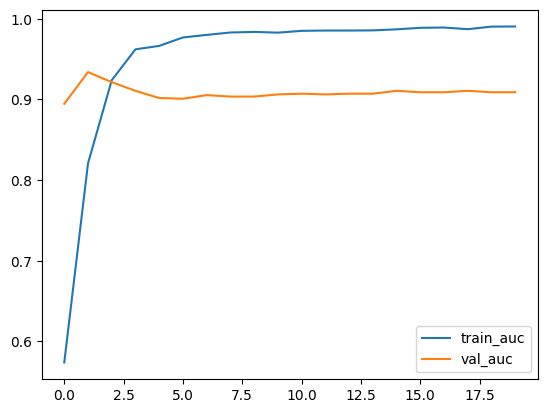

In [62]:
plt.plot(history.history['auc'], label = 'train_auc')
plt.plot(history.history['val_auc'], label = 'val_auc')

plt.legend()
plt.show()

### 9. FINAL MODEL
* XGBOOST

In [70]:
xgb_params = {
    'eta': 0.2,
    'max_depth': 3,
    'min_child_weight': 2,
    'scale_pos_weight': pos_weight,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dTrain, evals = [(dTrain, 'train'), (dTest, 'test')], num_boost_round = 7, verbose_eval = 5)
y_prediction = model.predict(dTest)

roc_auc_score(y_test, y_prediction)

[0]	train-auc:0.82965	test-auc:0.86979
[5]	train-auc:0.92509	test-auc:0.95964
[6]	train-auc:0.93991	test-auc:0.97396


0.9739583333333333

### 10. TEST MODEL

In [71]:
patient_dict = test_dict[0]
patient_dict

{'gender': 'f',
 'age': 77,
 'smoking': 'no',
 'yellow_fingers': 'no',
 'anxiety': 'no',
 'peer_pressure': 'yes',
 'chronic_disease': 'yes',
 'fatigue': 'yes',
 'allergy': 'yes',
 'wheezing': 'yes',
 'alcohol_consuming': 'yes',
 'coughing': 'no',
 'shortness_of_breath': 'no',
 'swallowing_difficulty': 'no',
 'chest_pain': 'yes'}

In [72]:
X_patient = dictVectorizer.transform(patient_dict)
X_patient

array([[77.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         1.,  1.,  0.]])

In [73]:
dPatient = xgb.DMatrix(X_patient, feature_names = feature_matrix)

def test_model():
    heart_failure = model.predict(dPatient)
    print(f"The probability of the patient having a heart failure is: {heart_failure}.")
    
    if heart_failure >= 0.5:
       print("The patient is likely to have a heart failure.")
    else:
       print("The patient has a healthy heart.")

test_model()

The probability of the patient having a heart failure is: [0.6365126].
The patient is likely to have a heart failure.


### 11. SAVE MODEL

In [67]:
import pickle

In [68]:
output_file = f'lung_cancer_model.bin'

with open(output_file, 'wb') as f_out:
    pickle.dump((dictVectorizer, model, feature_matrix), f_out)
    print("model successfully saved.")

model successfully saved.


### 12. LOAD MODEL

In [69]:
with open(output_file, 'rb') as f_in:
    dictVectorizer, model, feature_matrix = pickle.load(f_in)
    print("model successfully loaded.")

model successfully loaded.
